# Project name -- Credit_card_approval_Prediction

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
independent=pd.read_csv("D:\\00 project\\newdata\\application_record.csv")
dependent=pd.read_csv("D:\\00 project\\newdata\\credit_record.csv")

In [3]:
independent.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
dependent.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
#Now,we two types of data independent and dependent .so we have to merge the Data.
data = independent.merge(dependent,how='inner',on=['ID'])

In [6]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [7]:
data.shape

(777715, 20)

In [8]:
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
#the description contains these information for each column: 
#count - The number of not-empty values. mean - The average (mean) value.
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [11]:
#If any null value is present, it will automatically be excluded. It also ignores non-numeric data type columns from the DataFrame.
data.corr() #corelation 

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_1760\4014252022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corelation


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
ID,1.000000,0.026269,-0.027597,0.042020,-0.025322,NaN,0.084800,0.006346,-0.056083,0.027375,0.005007
CNT_CHILDREN,0.026269,1.000000,0.039304,0.356177,-0.228945,NaN,0.042226,-0.018882,0.015726,0.892079,0.000913
AMT_INCOME_TOTAL,-0.027597,0.039304,1.000000,0.081231,-0.180674,NaN,-0.021229,0.018687,0.085776,0.031379,0.001831
DAYS_BIRTH,0.042020,0.356177,0.081231,1.000000,-0.608856,NaN,0.180658,-0.026717,0.100945,0.327750,0.035756
DAYS_EMPLOYED,-0.025322,-0.228945,-0.180674,-0.608856,1.000000,NaN,-0.243677,-0.013817,-0.082474,-0.227645,-0.004222
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.084800,0.042226,-0.021229,0.180658,-0.243677,NaN,1.000000,0.312552,-0.037991,0.060183,0.001529
FLAG_PHONE,0.006346,-0.018882,0.018687,-0.026717,-0.013817,NaN,0.312552,1.000000,0.011901,-0.007824,-0.005120
FLAG_EMAIL,-0.056083,0.015726,0.085776,0.100945,-0.082474,NaN,-0.037991,0.011901,1.000000,0.012540,0.005288
CNT_FAM_MEMBERS,0.027375,0.892079,0.031379,0.327750,-0.227645,NaN,0.060183,-0.007824,0.012540,1.000000,-0.006276


# Data cleaning 

In [12]:
#NULL values in data
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
CODE_GENDER                 0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [13]:
data.duplicated().sum()

0

<Axes: >

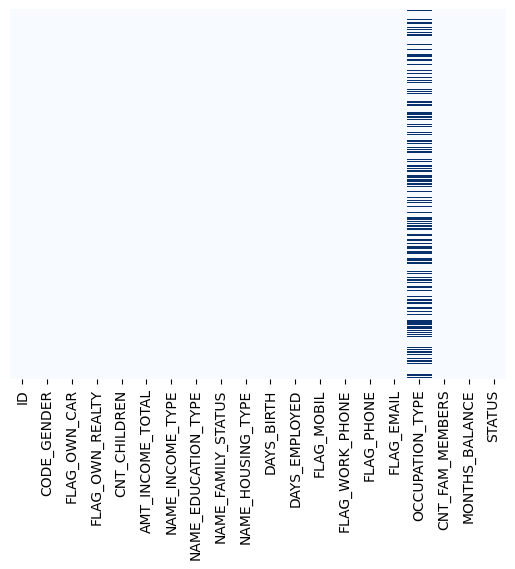

In [14]:
call=data.columns
sns.heatmap(data[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

In [15]:
#FLAG_MOBIL column is not correlated to any feature so let's drop the that column
data.drop('FLAG_MOBIL',inplace=True,axis=1)

# Feature Engineering

In [16]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
DAYS_BIRTH                  0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
DAYS_EMPLOYED               0
NAME_HOUSING_TYPE           0
CODE_GENDER                 0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [17]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
data['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [19]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [20]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [21]:
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [22]:
data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].apply(education)

In [23]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [24]:
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

In [25]:
data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].apply(fun)

In [26]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary            524261
Higher education     213633
Incomplete higher     30329
Lower secondary        8655
Academic degree         837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [27]:
data['NAME_FAMILY_STATUS'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [28]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,-4,C


In [29]:
import datetime
from datetime import timedelta

In [30]:
## This function takes no of days and convert it into their datetime format
#Date_of_Birth function:
#It takes a parameter, "total_days", which represents the total number of days since a person's birth.
#The function calculates the person's birthday by adding the "total_days" to the current date using the "timedelta" function from the datetime module.
#The strftime('%Y-%m-%d') method is used to format the date in the format 'YYYY-MM-DD'.
#The function returns the formatted birthday date.

def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
#Similar to the Date_of_Birth function, it also takes a parameter, total_days, which represents the total number of days since a person started working.
#The function calculates the person's employed date by adding the total_days to the current date using the timedelta function from the datetime module.
#The strftime('%Y-%m-%d') method is used to format the date in the format 'YYYY-MM-DD'.
#The function returns the formatted employed date.

def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [31]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(Date_of_Birth)

In [32]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(Date_of_Birth)

In [33]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-08,2011-07-16,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-08,2011-07-16,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-08,2011-07-16,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-08,2011-07-16,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1991-02-08,2011-07-16,1,0,0,Other,2.0,-4,C


In [34]:
#let's create a function to calculate age of the employee
#This code defines a function called AGE that takes a parameter date_of_birth, 
##which represents a person's date of birth in the format 'YYYY-MM-DD'. 
###The function calculates the person's age based on their date of birth.

#It gets the current date using datetime.date.today().
#It converts the date_of_birth parameter from a string to a datetime.date object using the strptime function from the datetime module.
#It calculates the person's age by subtracting the year of birth from the current year.
#The function returns the calculated age.

def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [35]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'].apply(AGE)

In [36]:
data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED'].apply(AGE)

In [37]:
data.rename(columns={'DAYS_BIRTH':'Age'},inplace=True)

In [38]:
data.rename(columns={'DAYS_EMPLOYED':'Days_worked'},inplace=True)

In [39]:
data.rename(columns={'CODE_GENDER':'Gender'},inplace=True)

In [40]:
data.rename(columns={'NAME_INCOME_TYPE':'Type_Income'},inplace=True)

In [41]:
data.rename(columns={'NAME_EDUCATION_TYPE':'Education'},inplace=True)

In [42]:
data.rename(columns={'NAME_FAMILY_STATUS':'Marital_status'},inplace=True)

In [43]:
data.rename(columns={'NAME_HOUSING_TYPE':'Housing_type'},inplace=True)

In [44]:
data.head()

,ID,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Type_Income,Education,Marital_status,Housing_type,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-4,C


In [45]:
#target
data['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [46]:
#selecting values
data.loc[data['STATUS']=='C','STATUS']=6
data.loc[data['STATUS']=='X','STATUS']=7

In [47]:
data['STATUS']=data['STATUS'].astype(float)

In [48]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target

In [49]:
data['Target']=data['STATUS'].apply(solve)

In [50]:
data['Target'].value_counts()

0    774887
1      2828
Name: Target, dtype: int64

In [51]:
data.head()

,ID,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Type_Income,Education,Marital_status,Housing_type,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,0,6.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-1,6.0,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-2,6.0,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-3,6.0,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-4,6.0,0


In [52]:
#saving clean data
data.to_csv("D:\\00 project\\newdata\\Clean_data.csv")

# Data Visualisation

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_1760\1930739006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


<Axes: >

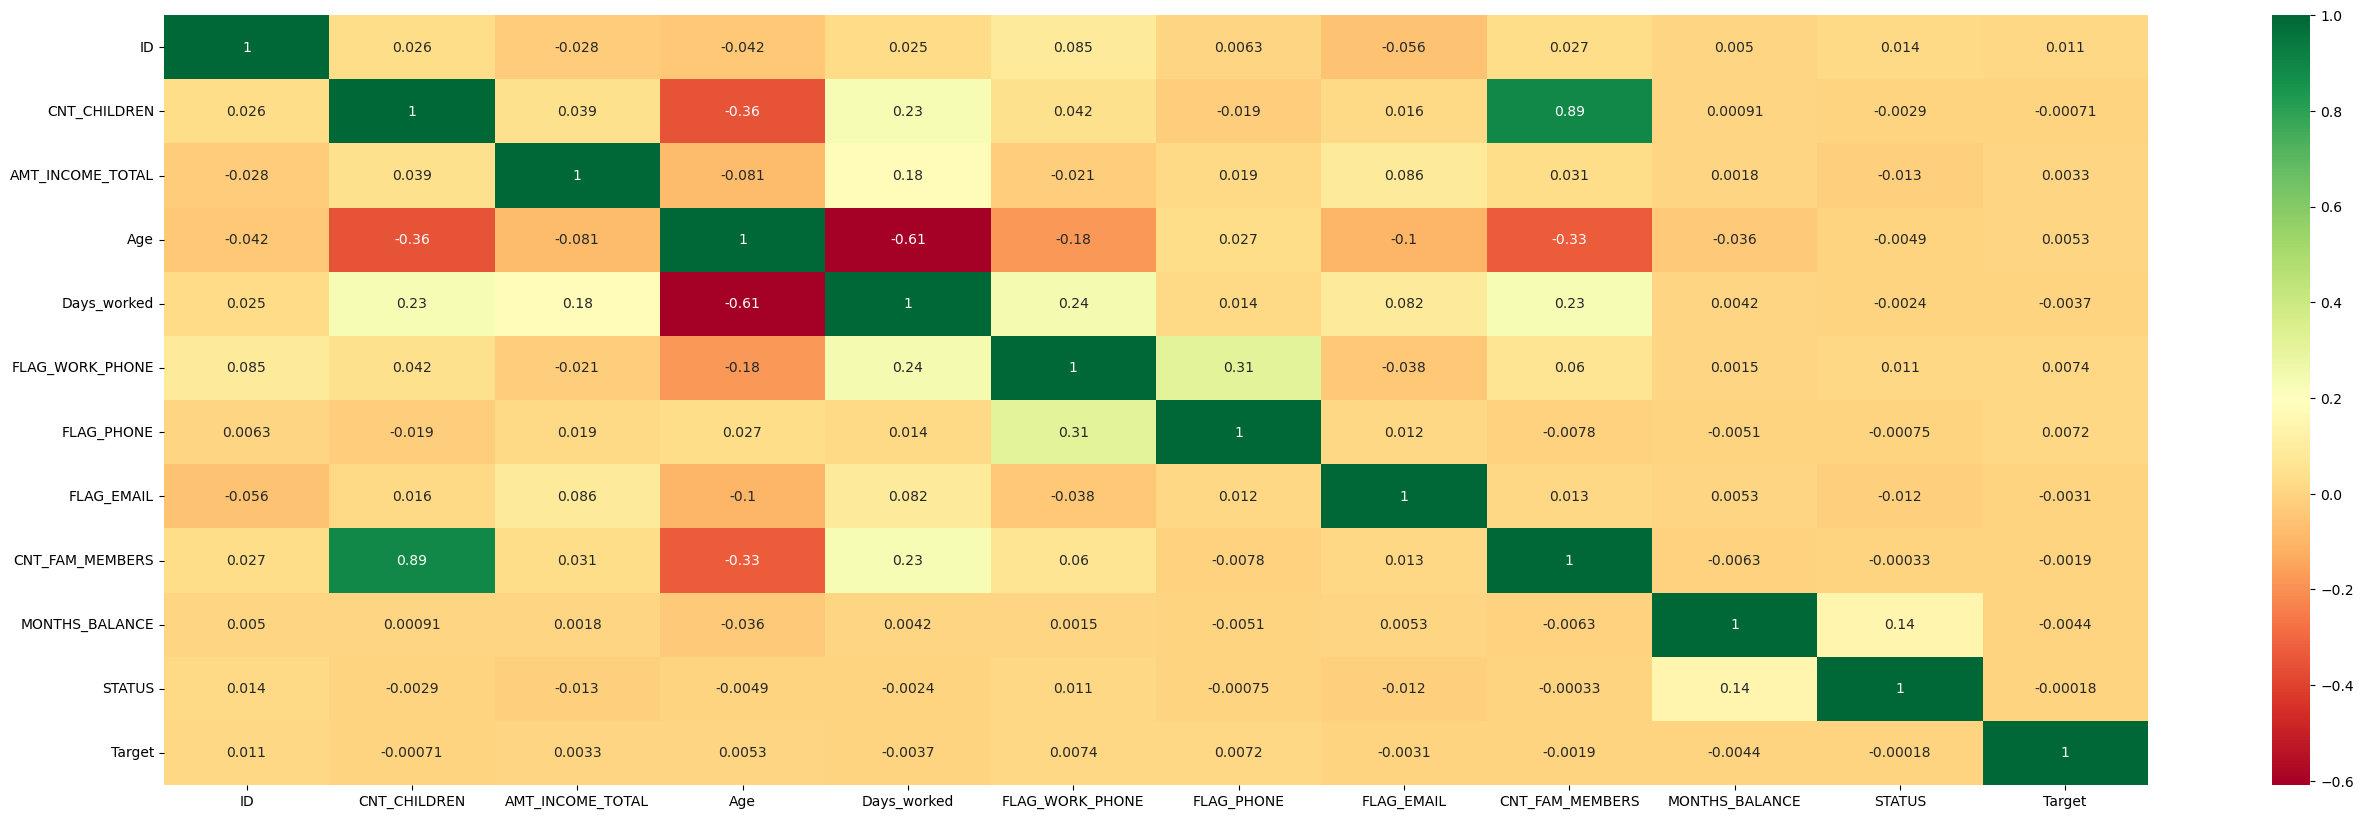

In [53]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='Gender', ylabel='count'>

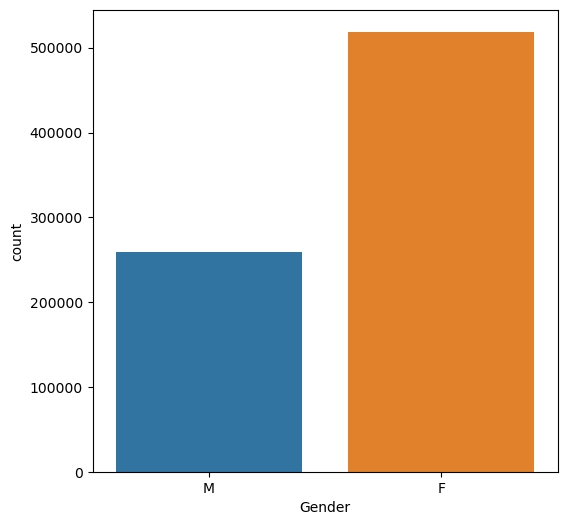

In [54]:
plt.figure(figsize = (6,6))
sns.countplot(x=data["Gender"])

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_1760\1373243255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.Age)


<Axes: ylabel='Density'>

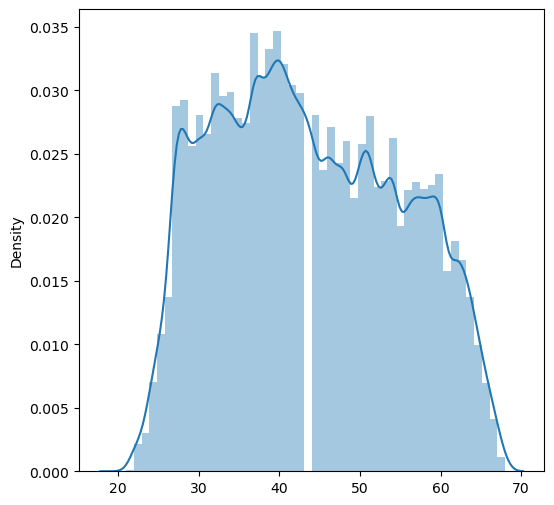

In [55]:
plt.figure(figsize = (6,6))
sns.distplot(x=data.Age)

In [56]:
data['Marital_status'].value_counts()

Married           546619
Single             94335
Civil marriage     60342
Separated          45255
Widow              31164
Name: Marital_status, dtype: int64

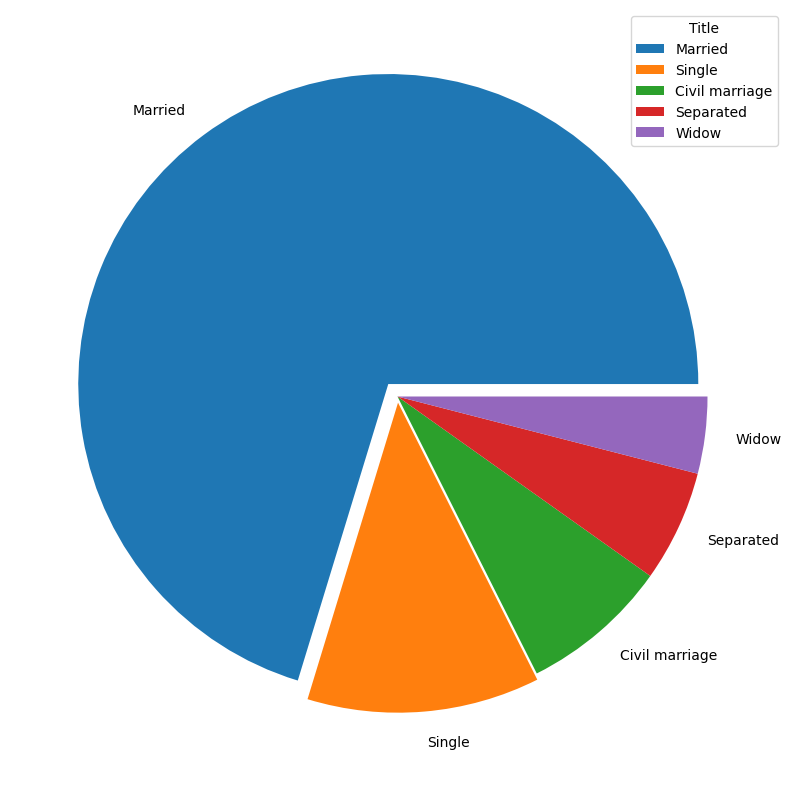

In [57]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['Marital_status']=='Married'
m=m.sum()
s=data['Marital_status']=='Single'
s=s.sum()
Cv=data['Marital_status']=='Civil marriage'
Cv=Cv.sum()
sep=data['Marital_status']=='Separated'
sep=sep.sum()
w=data['Marital_status']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.

In [58]:
data['Housing_type'].value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: Housing_type, dtype: int64

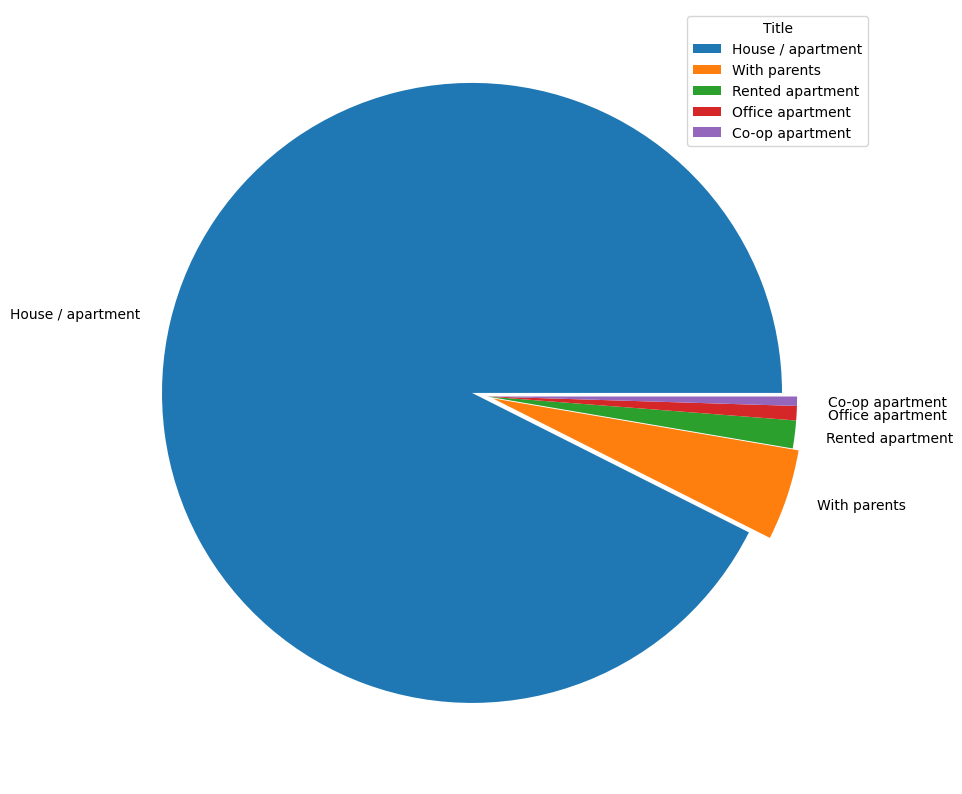

In [59]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['Housing_type']=='House / apartment'
m=m.sum()
s=data['Housing_type']=='With parents'
s=s.sum()
Cv=data['Housing_type']=='Rented apartment'
Cv=Cv.sum()
sep=data['Housing_type']=='Office apartment'
sep=sep.sum()
w=data['Housing_type']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From this above pie chart , we conclude that most of the people lives in their own house or apartment.So There is a high chance that they are able to pay their bills on time ,so we can approve their credit card

# Feature Scaling

In [60]:
# let's make all data in one scale,for that we have to first change the categorical data to numrical data .
data.head()

,ID,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Type_Income,Education,Marital_status,Housing_type,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,0,6.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-1,6.0,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-2,6.0,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-3,6.0,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12,1,0,0,Other,2.0,-4,6.0,0


In [61]:
data.dtypes

ID                    int64
Gender               object
FLAG_OWN_CAR         object
FLAG_OWN_REALTY      object
CNT_CHILDREN          int64
AMT_INCOME_TOTAL    float64
Type_Income          object
Education            object
Marital_status       object
Housing_type         object
Age                   int64
Days_worked           int64
FLAG_WORK_PHONE       int64
FLAG_PHONE            int64
FLAG_EMAIL            int64
OCCUPATION_TYPE      object
CNT_FAM_MEMBERS     float64
MONTHS_BALANCE        int64
STATUS              float64
Target                int64
dtype: object

In [62]:
#to convert catagirical to numerical
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()

In [64]:
data["Type_Income"]=le.fit_transform(data["Type_Income"])
data["Education"]=le.fit_transform(data["Education"])
data["OCCUPATION_TYPE"]=le.fit_transform(data["OCCUPATION_TYPE"])
data["Housing_type"]=le.fit_transform(data["Housing_type"])
data["Marital_status"]=le.fit_transform(data["Marital_status"])

In [65]:
data.head()

,ID,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,Type_Income,Education,Marital_status,Housing_type,Age,Days_worked,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Target
0,5008804,M,Y,Y,0,427500.0,4,1,0,4,32,12,1,0,0,12,2.0,0,6.0,0
1,5008804,M,Y,Y,0,427500.0,4,1,0,4,32,12,1,0,0,12,2.0,-1,6.0,0
2,5008804,M,Y,Y,0,427500.0,4,1,0,4,32,12,1,0,0,12,2.0,-2,6.0,0
3,5008804,M,Y,Y,0,427500.0,4,1,0,4,32,12,1,0,0,12,2.0,-3,6.0,0
4,5008804,M,Y,Y,0,427500.0,4,1,0,4,32,12,1,0,0,12,2.0,-4,6.0,0


In [66]:
#drop unwanted coloumns
data.drop(['Gender','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','OCCUPATION_TYPE'],inplace=True,axis=1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                777715 non-null  int64  
 1   CNT_CHILDREN      777715 non-null  int64  
 2   AMT_INCOME_TOTAL  777715 non-null  float64
 3   Type_Income       777715 non-null  int32  
 4   Education         777715 non-null  int32  
 5   Marital_status    777715 non-null  int32  
 6   Housing_type      777715 non-null  int32  
 7   Age               777715 non-null  int64  
 8   Days_worked       777715 non-null  int64  
 9   FLAG_PHONE        777715 non-null  int64  
 10  FLAG_EMAIL        777715 non-null  int64  
 11  CNT_FAM_MEMBERS   777715 non-null  float64
 12  MONTHS_BALANCE    777715 non-null  int64  
 13  STATUS            777715 non-null  float64
 14  Target            777715 non-null  int64  
dtypes: float64(3), int32(4), int64(8)
memory usage: 83.1 MB


In [68]:
x=data.drop('Target',axis=1)
y=data['Target']

In [69]:
#scale the values of all variable to same scale
feature_scale = [feature for feature in data.columns if feature!='Target']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [70]:
scaler.transform(x)

array([[0.        , 0.        , 0.25872093, ..., 0.05263158, 1.        ,
        0.85714286],
       [0.        , 0.        , 0.25872093, ..., 0.05263158, 0.98333333,
        0.85714286],
       [0.        , 0.        , 0.25872093, ..., 0.05263158, 0.96666667,
        0.85714286],
       ...,
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.81666667,
        0.14285714],
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.8       ,
        0.        ],
       [0.9989413 , 0.        , 0.05523256, ..., 0.        , 0.78333333,
        0.        ]])

In [71]:
#this code is creating a new DataFrame data by combining the 'Target' column from the original data 
#DataFrame with the scaled features obtained from the x DataFrame using a specified scaler. The resulting DataFrame is 
#ready for further analysis or modeling, with the 'Target' column and scaled features side by side

data = pd.concat([data['Target'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

In [72]:
data.head()

,Target,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,Type_Income,Education,Marital_status,Housing_type,Age,Days_worked,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,0.0,0.0,0.258721,1.0,0.25,0.0,0.8,0.25,0.970278,0.0,0.0,0.052632,1.000000,0.857143
1,0,0.0,0.0,0.258721,1.0,0.25,0.0,0.8,0.25,0.970278,0.0,0.0,0.052632,0.983333,0.857143
2,0,0.0,0.0,0.258721,1.0,0.25,0.0,0.8,0.25,0.970278,0.0,0.0,0.052632,0.966667,0.857143
3,0,0.0,0.0,0.258721,1.0,0.25,0.0,0.8,0.25,0.970278,0.0,0.0,0.052632,0.950000,0.857143
4,0,0.0,0.0,0.258721,1.0,0.25,0.0,0.8,0.25,0.970278,0.0,0.0,0.052632,0.933333,0.857143


In [73]:
data.Target.value_counts()

0    774887
1      2828
Name: Target, dtype: int64

from the above output,we conclude that data is imbalanced.so, we have to do either under sampling or over sampling.we are going to do over sampling bcz in under sampling .we will lost our almost data.

# Dealing with Unbalanced Dataset

In [74]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [75]:
data.shape

(777715, 15)

In [76]:
x_res,y_res=sm.fit_resample(x,y)

In [77]:
x_res.shape

(1549774, 14)

In [78]:
y_res.shape

(1549774,)

In [79]:
# from collections import Counter
from collections import Counter

In [80]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 774887, 1: 2828})
Resampled dataset shape Counter({0: 774887, 1: 774887})


# Splitting

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)

In [83]:
x_train.shape,y_train.shape

((1239819, 14), (1239819,))

# TRAINING THE MODEL

# LogisticRegression

In [84]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr=LogisticRegression()

In [87]:
lr.fit(x_train,y_train)

LogisticRegression()

In [88]:
pred=lr.predict(x_test)

In [89]:
print(confusion_matrix(y_test,pred))

[[101060  53695]
 [ 90681  64519]]


In [90]:
print(accuracy_score(y_test,pred))

0.5342033520994983


In [91]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58    154755
           1       0.55      0.42      0.47    155200

    accuracy                           0.53    309955
   macro avg       0.54      0.53      0.53    309955
weighted avg       0.54      0.53      0.53    309955



# Decision Tree Classifier

In [92]:
#working with classifier 
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt=DecisionTreeClassifier()

In [94]:
dt.fit(x_train,y_train) #it is useful to train model

DecisionTreeClassifier()

In [95]:
pred1=dt.predict(x_test)

In [96]:
print(confusion_matrix(pred1,y_test))

[[154755      0]
 [     0 155200]]


In [97]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154755
           1       1.00      1.00      1.00    155200

    accuracy                           1.00    309955
   macro avg       1.00      1.00      1.00    309955
weighted avg       1.00      1.00      1.00    309955



# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf=RandomForestClassifier()

In [100]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
pred2=rf.predict(x_test)

In [102]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154755
           1       1.00      1.00      1.00    155200

    accuracy                           1.00    309955
   macro avg       1.00      1.00      1.00    309955
weighted avg       1.00      1.00      1.00    309955



# KNeighbors Classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
#start with random value of k
knn=KNeighborsClassifier(n_neighbors=3)

In [105]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
pred4=knn.predict(x_test)

In [107]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154755
           1       1.00      1.00      1.00    155200

    accuracy                           1.00    309955
   macro avg       1.00      1.00      1.00    309955
weighted avg       1.00      1.00      1.00    309955



From accuracy score we conclude that we should apply 
Decision Treeclassifier, Random Forestclassifier and KNeighborsClassifier algorith for be